In [ ]:
1# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [ ]:
# Both features and target have already been scaled: mean = 0; SD = 1

url = 'https://drive.google.com/file/d/1Ab-DktBZy0zn4u0zWYBwWnnr7SnfJCak/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)


In [ ]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [ ]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs


,1
0,
intercept,-3.06336e-11
LotArea,0.0789996
OverallQual,0.214395
OverallCond,0.0964787
YearBuilt,0.160799
YearRemodAdd,0.0253524
BsmtFinSF1,0.0914664
BsmtUnfSF,-0.0330798
TotalBsmtSF,0.138199


In [ ]:
# calculate the mse of the regression
pred = lr.predict(X_val)
mse_original = mse(y_val, pred)
print(mse_original)

0.1170249946012166


###### Ridge Regression

In [ ]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [ ]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091358
0.11710797319753004
0.11723952924901127
0.11741457158889525
0.11762384068711469
0.11825709631198024
0.11900057469147929
0.12254649996292954
0.13073599680747128


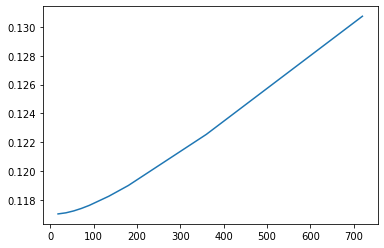

In [ ]:
plt.plot(alphas, mses)

###### Lasso

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

In [ ]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs


,1
0,
intercept,-1.25303e-11
LotArea,0.0443042
OverallQual,0.298079
OverallCond,0
YearBuilt,0.0520907
YearRemodAdd,0.0644712
BsmtFinSF1,0.115875
BsmtUnfSF,-0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [ ]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.1165475190960879
0.11682687945311097
0.1180334835313203
0.12012836764958999
0.12301536903084041
0.13178576395045638
0.14017194584483775


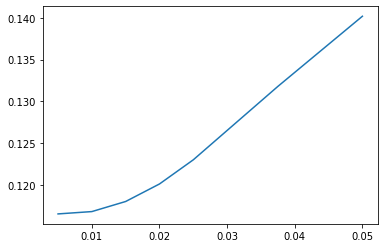

In [ ]:
plt.plot(alphas, mses)

###  Data with Additional Features (Cleaning Method #1)

In [ ]:
# 4 additional features are added to the data: 
# LotFrontage, LotShape which is broken down into 3 dummy variables: IR1, IR2, IR3, Yr Sold, SaleCondition (5 dummies)
url = 'https://drive.google.com/file/d/160U3Nw_KwWM2gz5bzFdBi96KIHklPWKH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_add = pd.read_csv(path)

data_add.head(10)


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,Names,NoRidge,NPkVill,NriddgHt,NWAmes,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,0.423045,0.789653,1.208820,0.173443,0.960943,-0.947675,0.304041,0.348200,-0.749963,0.222420,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,65.0,0,0,0,2008,0,0,0,0,0
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,-0.490655,0.789653,-0.769249,0.173443,-0.297934,0.608725,0.304041,-0.070795,1.637145,-0.718903,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,80.0,0,0,0,2007,0,0,0,0,0
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,0.578048,0.789653,1.208820,0.173443,-0.297934,0.608725,0.304041,0.633878,-0.749963,-0.070779,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,68.0,1,0,0,2008,0,0,0,0,0
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,0.437322,-1.039659,-0.769249,0.173443,0.331504,0.608725,1.648693,0.795763,-0.749963,-0.178800,4.059560,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,5.631132,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,60.0,1,0,0,2006,1,0,0,0,0
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,1.418326,0.789653,1.208820,1.407428,1.590381,0.608725,1.648693,1.719456,0.788039,0.577345,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,6.105502,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,84.0,1,0,0,2008,0,0,0,0,0
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,-0.286704,-1.039659,1.208820,-2.294526,-0.927373,-0.947675,0.304041,0.024431,-0.429546,-0.255958,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,5.293079,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.489711,85.0,1,0,0,2009,0,0,0,0,0
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,0.390413,0.789653,-0.769249,0.173443,0.331504,0.608725,0.304041,0.767195,1.292696,0.160694,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,3.724020,-0.127929,-0.152629,-0.091644,1.746467,1.634027,75.0,0,0,0,2007,0,0,0,0,0
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.7

In [ ]:
#Data cleaning for LotFrontage
#First method: replace missing value with median

frontage_median = data_add['LotFrontage'].median()
data_add['LotFrontage'] = data_add['LotFrontage'].fillna(frontage_median)

#Scale LotFrontage, IR1, IR2, IR3, YrSold, and the 5 dummies for SaleConditon: Abnormal, AdjLand, Alloca, Family, Partial

for col in ['LotFrontage', 'IR1', 'IR2', 'IR3', 'YrSold', 'Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']:
    data_add[col] = (data_add[col] - data_add[col].mean())/data_add[col].std()

data_add.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,Names,NoRidge,NPkVill,NriddgHt,NWAmes,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,0.423045,0.789653,1.208820,0.173443,0.960943,-0.947675,0.304041,0.348200,-0.749963,0.222420,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-0.188430,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,-0.490655,0.789653,-0.769249,0.173443,-0.297934,0.608725,0.304041,-0.070795,1.637145,-0.718903,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,0.535803,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,0.578048,0.789653,1.208820,0.173443,-0.297934,0.608725,0.304041,0.633878,-0.749963,-0.070779,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-0.043584,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,0.437322,-1.039659,-0.769249,0.173443,0.331504,0.608725,1.648693,0.795763,-0.749963,-0.178800,4.059560,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,5.631132,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-0.429841,1.422031,-0.163789,-0.071994,-1.362613,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,1.418326,0.789653,1.208820,1.407428,1.590381,0.608725,1.648693,1.719456,0.788039,0.577345,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,6.105502,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,0.728932,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,-0.286704,-1.039659,1.208820,-2.294526,-0.927373,-0.947675,0.304041,0.024431,-0.429546,-0.255958,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,5.293079,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.489711,0.777214,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,0.390413,0.789653,-0.7692

In [ ]:
# Split the data into training set and validation set
train_add = data_add.iloc[:1800] 
val_add = data_add.iloc[1800:2400]

# Creating the "X" and "y" variables. We drop sale price from "X"
X_train_add, X_val_add = train_add.drop('Sale Price', axis=1), val_add.drop('Sale Price', axis=1)
y_train_add, y_val_add = train_add[['Sale Price']], val_add[['Sale Price']] 

print(y_train_add.head())

   Sale Price
0    0.358489
1    0.008849
2    0.552733
3   -0.528560
4    0.895898


### Linear Regression Additional Features (for Cleaning Method #1)

In [ ]:
lr=LinearRegression()
lr.fit(X_train_add,y_train_add)


NameError: ignored

In [ ]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs_add = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs_add

pred = lr.predict(X_train_add)
mse_add1 = mse(y_train_add, pred)
print(mse_add1)


In [ ]:
# Compare the two regression models
mse_add = mse(y_val_add, lr.predict(X_val_add))


print("MSE of original regression: " + str(mse_original))
print("MSE of training set with additional features: " + str(mse_add1))
print("MSE of validation set regression with additional features: " + str(mse_add))

In [ ]:
#Ridge Regression with Additional features

alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_add,y_train_add)
    pred=ridge.predict(X_val_add)
    mses.append(mse(y_val_add,pred))
    print(mse(y_val_add,pred))

In [ ]:
#Using a = 0.01*1800 for ridge regression
ridge = Ridge(alpha=0.01*1800)
ridge.fit(X_train_add, y_train_add)
list1 = ['intercept'] + list(X_train_add.columns)
list2 = list(ridge.intercept_)
list3 = ridge.coef_[0]
list2.extend(list3)

coeffs = pd.DataFrame(
    {
        'feature': list1,
        'coefficient': list2
    }
)
coeffs

In [ ]:
#Using a = 0.05 first lasso regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train_add, y_train_add)
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

In [ ]:
#Lasso Regression with Additional features
alphas_add=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas_add:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_add,y_train_add)
    pred=lasso.predict(X_val_add)
    mses.append(mse(y_val_add,pred))
    print(mse(y_val_add, pred))

In [ ]:
#Randomly splitting data into training, validation, and test set

from sklearn.model_selection import train_test_split


train_size = 1800/2908
valid_size = 600/2908
test_size = 508/2908


X = X_train_add
y = y_train_add

X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(X, y, test_size=1 - train_size)
X_rvalid, X_rtest, y_rvalid, y_rtest = train_test_split(X_rtest,y_rtest, test_size=test_size/(test_size + valid_size))

print(X_rtrain, X_rtest, y_rtrain, y_rtest)
print(X_rvalid, X_rtest, y_rvalid, y_rtest)

In [ ]:
lr=LinearRegression()
lr.fit(X_rtrain,y_rtrain)

#Create dataFrame with corresponding feature and its respective coefficients
coeffs_add = pd.DataFrame(
    [
        ['intercept'] + list(X_rtrain.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs_add



In [ ]:
# Compare the three regression models
pred1 = lr.predict(X_rtrain)
mse_rand_train = mse(y_rtrain, pred1)
print(mse_rand_train)

pred = lr.predict(X_rvalid)
mse_add_rand = mse(y_rvalid, pred)

print("MSE of original regression:" + str(mse_original))
print("MSE of regression with additional features:" + str(mse_add))
print("MSE of training set regression with random split and additional features:" + str(mse_rand_train))
print("MSE of validation set regression with random split and additional features:" + str(mse_add_rand))

In [ ]:
#Ridge regression alpha = 0.1*1800, weights

#Using a = 0.01*1800 for ridge regression
ridge_r = Ridge(alpha=0.01*1800)
ridge_r.fit(X_rtrain, y_rtrain)
listr1 = ['intercept'] + list(X_rtrain.columns)
listr2 = list(ridge_r.intercept_)
listr3 = ridge_r.coef_[0]
listr2.extend(listr3)

coeffs_r = pd.DataFrame(
    {
        'feature': listr1,
        'coefficient': listr2
    }
)
coeffs_r

In [ ]:
#Ridge Regression with Random Split different alphas

alphas_add=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas_add:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_rtrain,y_rtrain)
    pred=ridge.predict(X_rvalid)
    mses.append(mse(y_rvalid,pred))
    print(mse(y_rvalid,pred))

In [ ]:
#Using a = 0.05 first lasso regression random split
lasso = Lasso(alpha=0.05)
lasso.fit(X_rtrain, y_rtrain)
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_rtrain.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

In [ ]:
#Lasso Regression with Random Split
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_rtrain,y_rtrain)
    pred=lasso.predict(X_rvalid)
    mses.append(mse(y_rvalid,pred))
    print(mse(y_rvalid, pred))

## Data with Additional Features (Cleaning Method #2)


In [ ]:
# 4 additional features are added to the data: 
# LotFrontage, LotShape which is broken down into 3 dummy variables: IR1, IR2, IR3, Yr Sold, SaleCondition (5 dummies)
url = 'https://drive.google.com/file/d/160U3Nw_KwWM2gz5bzFdBi96KIHklPWKH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data_add2 = pd.read_csv(path)

data_add2.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,Names,NoRidge,NPkVill,NriddgHt,NWAmes,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,0.423045,0.789653,1.208820,0.173443,0.960943,-0.947675,0.304041,0.348200,-0.749963,0.222420,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,65.0,0,0,0,2008,0,0,0,0,0
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,-0.490655,0.789653,-0.769249,0.173443,-0.297934,0.608725,0.304041,-0.070795,1.637145,-0.718903,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,80.0,0,0,0,2007,0,0,0,0,0
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,0.578048,0.789653,1.208820,0.173443,-0.297934,0.608725,0.304041,0.633878,-0.749963,-0.070779,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,68.0,1,0,0,2008,0,0,0,0,0
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,0.437322,-1.039659,-0.769249,0.173443,0.331504,0.608725,1.648693,0.795763,-0.749963,-0.178800,4.059560,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,5.631132,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,60.0,1,0,0,2006,1,0,0,0,0
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,1.418326,0.789653,1.208820,1.407428,1.590381,0.608725,1.648693,1.719456,0.788039,0.577345,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,6.105502,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,84.0,1,0,0,2008,0,0,0,0,0
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,-0.286704,-1.039659,1.208820,-2.294526,-0.927373,-0.947675,0.304041,0.024431,-0.429546,-0.255958,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,5.293079,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.489711,85.0,1,0,0,2009,0,0,0,0,0
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,0.390413,0.789653,-0.769249,0.173443,0.331504,0.608725,0.304041,0.767195,1.292696,0.160694,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,3.724020,-0.127929,-0.152629,-0.091644,1.746467,1.634027,75.0,0,0,0,2007,0,0,0,0,0
7,0.014741,0.652747,0.388309,0.036583,-0.577556,0.946976,-0.7

In [ ]:
#Data cleaning for LotFrontage
#Second method: replace missing value with mean 

frontage_mean = data_add2['LotFrontage'].mean()
data_add2['LotFrontage'] = data_add2['LotFrontage'].fillna(frontage_mean)


#Scale LotFrontage, IR1, IR2, IR3, YrSold, and the 5 dummies for SaleCondition: Abnormal, AdjLand, Alloca, Family, Partial

for col in ['LotFrontage', 'IR1', 'IR2', 'IR3', 'YrSold', 'Abnorml', 'AdjLand', 'Alloca', 'Family','Partial']:
    data_add2[col] = (data_add2[col] - data_add2[col].mean())/data_add2[col].std()

data_add2.head(10)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,Names,NoRidge,NPkVill,NriddgHt,NWAmes,OLDTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Bsmt Qual,Sale Price,LotFrontage,IR1,IR2,IR3,YrSold,Abnorml,AdjLand,Alloca,Family,Partial
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,0.423045,0.789653,1.208820,0.173443,0.960943,-0.947675,0.304041,0.348200,-0.749963,0.222420,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.358489,-1.972133e-01,-0.702978,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,-0.490655,0.789653,-0.769249,0.173443,-0.297934,0.608725,0.304041,-0.070795,1.637145,-0.718903,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,10.905682,0.584308,0.008849,5.271582e-01,-0.702978,-0.163789,-0.071994,-0.603227,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,0.578048,0.789653,1.208820,0.173443,-0.297934,0.608725,0.304041,0.633878,-0.749963,-0.070779,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,3.222830,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.552733,-5.233898e-02,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,0.437322,-1.039659,-0.769249,0.173443,0.331504,0.608725,1.648693,0.795763,-0.749963,-0.178800,4.059560,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,5.631132,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,-0.577852,-0.528560,-4.386705e-01,1.422031,-0.163789,-0.071994,-1.362613,3.824837,-0.06436,-0.089272,-0.126756,-0.301233
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,1.418326,0.789653,1.208820,1.407428,1.590381,0.608725,1.648693,1.719456,0.788039,0.577345,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,-0.188821,-0.446195,6.105502,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,0.895898,7.203240e-01,1.422031,-0.163789,-0.071994,0.156160,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
5,0.428835,-0.797802,-0.512407,0.704761,0.488205,0.657168,-1.131197,-0.626226,-0.969192,0.531738,-0.286704,-1.039659,1.208820,-2.294526,-0.927373,-0.947675,0.304041,0.024431,-0.429546,-0.255958,-0.357173,-0.103258,-0.04718,-0.10597,-0.196570,-0.134497,-0.310114,-0.177486,-0.255054,-0.253817,-0.150714,-0.108618,5.293079,-0.446195,-0.163696,-0.097618,-0.251329,-0.230690,-0.286942,-0.136621,-0.2253,-0.214192,-0.268378,-0.127929,-0.152629,-0.091644,0.584308,-0.489711,7.686154e-01,1.422031,-0.163789,-0.071994,0.915547,-0.261359,-0.06436,-0.089272,-0.126756,-0.301233
6,-0.018316,1.378022,-0.512407,1.072260,0.972641,2.110771,-0.560619,1.506244,1.431031,-0.789421,0

In [ ]:
# Split the data into training set and validation set
train_add2 = data_add2.iloc[:1800] 
val_add2 = data_add2.iloc[1800:2400]

# Creating the "X" and "y" variables. We drop sale price from "X"
X_train_add2, X_val_add2 = train_add2.drop('Sale Price', axis=1), val_add2.drop('Sale Price', axis=1)
y_train_add2, y_val_add2 = train_add2[['Sale Price']], val_add2[['Sale Price']]

## Linear Regression Additional Features (for Cleaning Method #2)


In [ ]:
lr=LinearRegression()
lr.fit(X_train_add2,y_train_add2)
# Create dataFrame with corresponding feature and its respective coefficients
coeffs_add2 = pd.DataFrame(
    [
        ['intercept'] + list(X_train_add2.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)

coeffs_add2

,1
0,
intercept,-16.2507
LotArea,0.0624366
OverallQual,0.213901
OverallCond,0.0944505
YearBuilt,0.147968
YearRemodAdd,0.0165116
BsmtFinSF1,0.0921331
BsmtUnfSF,-0.0443474
TotalBsmtSF,0.143959


In [ ]:
# Compare regression model with Method #1 (3) regression models 

pred_2 = lr.predict(X_train_add2)
mse_train_2 = mse(y_train_add2, pred_2)
pred_3 = lr.predict(X_val_add2)
mse_add2 = mse(y_val_add2, pred_3)

print("MSE of original regression:" + str(mse_original))
print("MSE of training set regression with additional features (Method #2):" + str(mse_train_2))
print("MSE of validation set regression with additional features (Method #1):" + str(mse_add))
print("MSE of validation set regression with additional features (Method #2):" + str(mse_add2))
print("MSE of training set regression with random split and additional features:" + str(mse_rand_train))
print("MSE of validation set regression with random split and additional features:" + str(mse_add_rand))

MSE of original regression:0.1170249946012166
MSE of training set regression with additional features (Method #2):0.10542069758843237
MSE of validation set regression with additional features (Method #1):0.11212326976913153
MSE of validation set regression with additional features (Method #2):0.11215233821168717
MSE of training set regression with random split and additional features:0.10489126636481493
MSE of validation set regression with random split and additional features:0.11316151315315202
